In [ ]:
# Importing some useful packages
import numpy as np #Numpy library provides various useful functions and operators for scientific computing
import cv2 as cv2 #openCV is a key library that provides various useful functions for computer vision
import os #Honestly this one is a bit optional.
import glob #again just optional
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Download images for Practical 2
!wget https://github.com/dsphamgithub/comp3007/raw/main/prac02/prac02.zip -O prac02.zip
!unzip prac02.zip

# Exercise 1 - Colour Conversion

In this exercise, you will write a program that reads a color image and performs various color conversions. You will observe the result and note the effect of each conversion.

#### Conversion from RGB to Gray
- **Task**: Convert the color image from the RGB color space to grayscale.
- **Observation**: This conversion will remove the color information, leaving only the intensity of light. The resulting image will be in shades of gray, representing the luminance of the original image.

#### Conversion from RGB to HSV
- **Task**: Convert the color image from the RGB color space to the HSV (Hue, Saturation, Value) color space.
- **Observation**: This conversion will represent the image in terms of its hue (color), saturation (vividness), and value (brightness). It's often used in color filtering and segmentation tasks.

#### Conversion from RGB to Luv
- **Task**: Convert the color image from the RGB color space to the Luv (Luminance, u, v) color space.
- **Observation**: The Luv color space is designed to be perceptually uniform, meaning that the perceptual difference between colors is consistent across the space. It's useful in tasks where human perception of colors is important.

#### Conversion from RGB to Lab
- **Task**: Convert the color image from the RGB color space to the Lab (Lightness, a, b) color space.
- **Observation**: Similar to Luv, the Lab color space is also designed to be perceptually uniform. It separates the chromatic information into two channels (a and b) and the lightness into a separate channel (L).

**Note**: Each of these conversions offers a different way to represent the color information in an image, and the choice of color space can have a significant impact on the subsequent image processing tasks. Experimenting with these conversions will help you understand how color information can be manipulated and utilized in various applications.


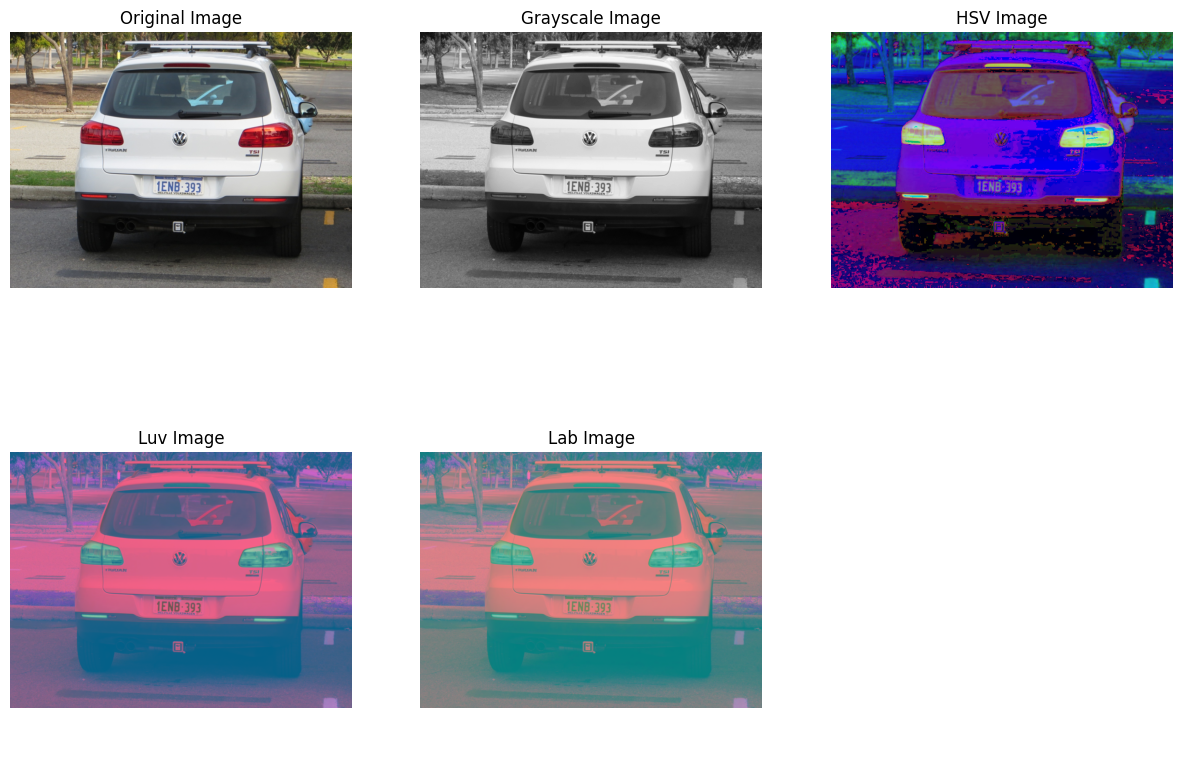

In [ ]:
# EXERCISE 1 - Colour Conversions

img_bgr = cv2.imread("prac02ex01img01.jpg")

# Convert BGR to RGB
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
# Convert BGR to grayscale
img_gray =
# Convert BGR to HSV
img_hsv =
# Convert BGR to Luv
img_luv =
# Convert BGR to Lab
img_lab =


# Plot images using subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Display the original image in the first subplot
axs[0, 0].imshow(img_rgb)
axs[0, 0].set_title('Original Image')

# Display the grayscale image in the second subplot


# Display the HSV image in the third subplot


# Display the Luv image in the fourth subplot


# Display the Lab image in the fifth subplot

# Remove axis for all subplots
for ax in axs.flat:
    ax.axis('off')

# Display the plot
plt.show()

# Exercise 2 - Linear Filtering

https://www.askpython.com/python-modules/opencv-filter2d

In this exercise, you will use the `filter2D` function in OpenCV to perform linear filtering on a gray-scale image with various kernels/filters. You will observe the result and comment on the effect of each filter.

#### Prewit Kernels
- **Kx** and **Ky** are used for edge detection, specifically for detecting vertical and horizontal edges.
- **Observation**: You may notice that the Prewit kernels emphasize the vertical and horizontal edges in the image.

#### Sobel Kernels
- **Kx** and **Ky** are used for edge detection, and they provide a more weighted calculation for the central pixels.
- **Observation**: Sobel kernels are likely to give a more pronounced detection of edges compared to Prewit kernels.

#### Laplacian Kernel
- **KLaplacian** is used to detect edges by highlighting regions of rapid intensity change.
- **Observation**: The Laplacian kernel may reveal finer details and can be used to enhance edges.

#### Gaussian Kernel with σ = 1
- **KGaussian** is used for blurring and noise reduction. It smoothens the image by averaging nearby pixels.
- **Observation**: The Gaussian kernel will blur the image, reducing noise and detail. The effect will be more pronounced with a larger value of σ.

**Note**: `filter2D` only computes the correlation, so you will need to flip the kernel to perform actual convolution.

Additionally, experiment with the `GaussianBlur` function in OpenCV for different values of the standard deviation \( \sigma_X \), and comment on the result when \( \sigma_X \) is varied from small to large. The effect of varying \( \sigma_X \) will influence the degree of blurring, with larger values leading to more blurring.



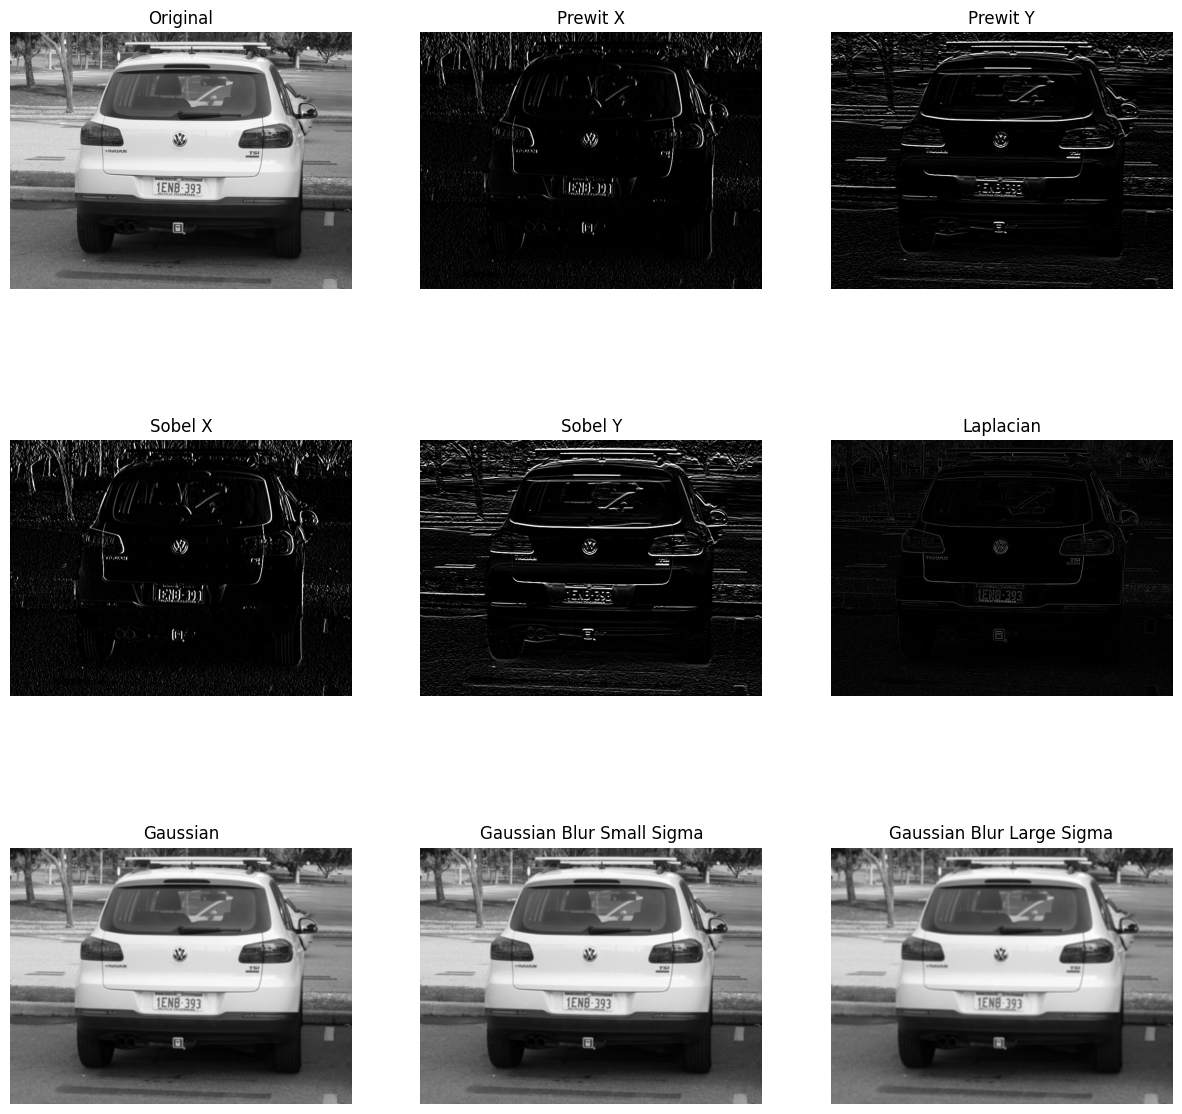

In [ ]:
# Input image is from Exercise 1
img = img_gray

# Define the filters
prewit_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
prewit_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

sobel_x =
sobel_y =

laplacian =

gaussian =

# Apply the filters
img_prewit_x = cv2.filter2D(img, -1, prewit_x)
img_prewit_y = cv2.filter2D(img, -1, prewit_y)

img_sobel_x =
img_sobel_y =

img_laplacian =

img_gaussian =

# Try GaussianBlur for different sigmaX
img_gaussian_blur_small_sigma =
img_gaussian_blur_large_sigma =

# Plot the original and filtered images
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

axes[0, 0].imshow(img, cmap='gray')
axes[0, 0].set_title('Original')

axes[0, 1].imshow(img_prewit_x, cmap='gray')
axes[0, 1].set_title('Prewit X')

axes[0, 2].imshow(img_prewit_y, cmap='gray')
axes[0, 2].set_title('Prewit Y')

axes[1, 0].imshow(img_sobel_x, cmap='gray')
axes[1, 0].set_title('Sobel X')

axes[1, 1].imshow(img_sobel_y, cmap='gray')
axes[1, 1].set_title('Sobel Y')

axes[1, 2].imshow(img_laplacian, cmap='gray')
axes[1, 2].set_title('Laplacian')

axes[2, 0].imshow(img_gaussian, cmap='gray')
axes[2, 0].set_title('Gaussian')

axes[2, 1].imshow(img_gaussian_blur_small_sigma, cmap='gray')
axes[2, 1].set_title('Gaussian Blur Small Sigma')

axes[2, 2].imshow(img_gaussian_blur_large_sigma, cmap='gray')
axes[2, 2].set_title('Gaussian Blur Large Sigma')

for ax in axes.flat:
    ax.axis('off')

plt.show()

# Exercise 3 - Median Filtering

https://medium.com/@florestony5454/median-filtering-with-python-and-opencv-2bce390be0d1


In this exercise, you are given a gray-scale image that has been corrupted with noise. Your task is to write a program that performs median filtering on this corrupted image.

#### Task
- Use OpenCV's `medianBlur` function to apply median filtering to the given image.
- Experiment with different kernel sizes to observe how they affect the result.

#### Observation
- **Median Filtering**: This is a non-linear filtering technique that replaces each pixel's value with the median of the neighboring pixels. It is particularly effective in removing salt-and-pepper noise.
- **Effect**: You should observe that the median filter helps remove the noise, preserving the edges while smoothing the image. The choice of kernel size will influence the degree of smoothing, with larger kernels leading to more pronounced smoothing.

#### Conclusion
Median filtering is a powerful tool for noise reduction, especially when dealing with non-Gaussian noise types. By experimenting with different kernel sizes, you can balance the trade-off between noise removal and preservation of image details.



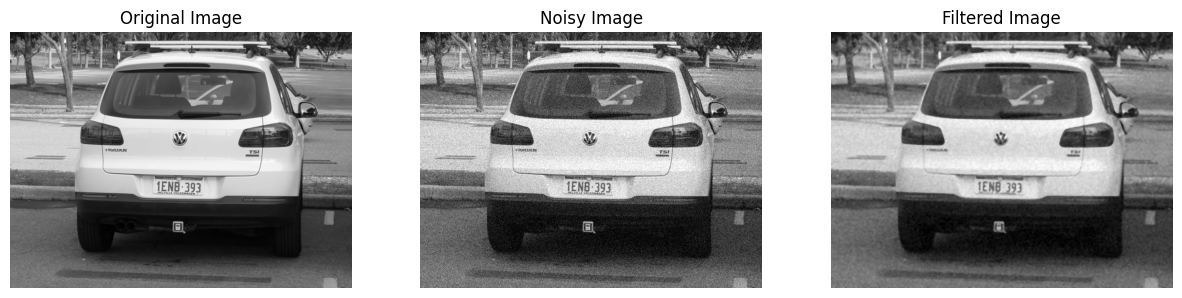

In [ ]:
# EXERCISE 3 - Median Filtering

img_org  = cv2.imread("prac02ex02img01.jpg", cv2.IMREAD_GRAYSCALE) # clean image
img_gray = cv2.imread("prac02ex02img02.jpg", cv2.IMREAD_GRAYSCALE) # corrupted image

# The second parameter is the kernel size. It must be an odd number.
kernel_size  = 5
img_filtered =

plt.figure(figsize=(15, 10))
plt.subplot(1, 3, 1)
plt.imshow(img_org, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# complete the plot

plt.show()

# Exercise 4 - Pixel Transform

https://docs.opencv.org/3.4/d3/dc1/tutorial_basic_linear_transform.html


In this exercise, you are asked to write a program that performs an affine transformation on all pixels of a gray-scale image that suffers from poor contrast and brightness. The goal is to enhance the image by adjusting its contrast and brightness.

#### Task
- Use the equation \( g(x,y) = \alpha f(x,y) + \beta \) to perform the affine transformation, where \( f(x,y) \) is the original image, \( \alpha \) is the contrast control, and \( \beta \) is the brightness control.
- Experiment with different values of \( \alpha \) and \( \beta \) to observe how they affect the image's contrast and brightness.
- You can use OpenCV's `convertScaleAbs` function to apply the transformation.

#### Observation
- **Contrast**: By adjusting \( \alpha \), you can control the image's contrast. A value greater than 1 will increase contrast, while a value between 0 and 1 will decrease it.
- **Brightness**: By adjusting \( \beta \), you can control the image's brightness. Positive values will increase brightness, while negative values will decrease it.
- **Effect**: You should observe that the affine transformation helps improve the contrast and brightness of the image, making it more visually appealing.

#### Conclusion
Affine transformations are a simple yet effective way to enhance the visual quality of an image. By adjusting the contrast and brightness, you can make an image more suitable for further processing or improve its appearance for display purposes.


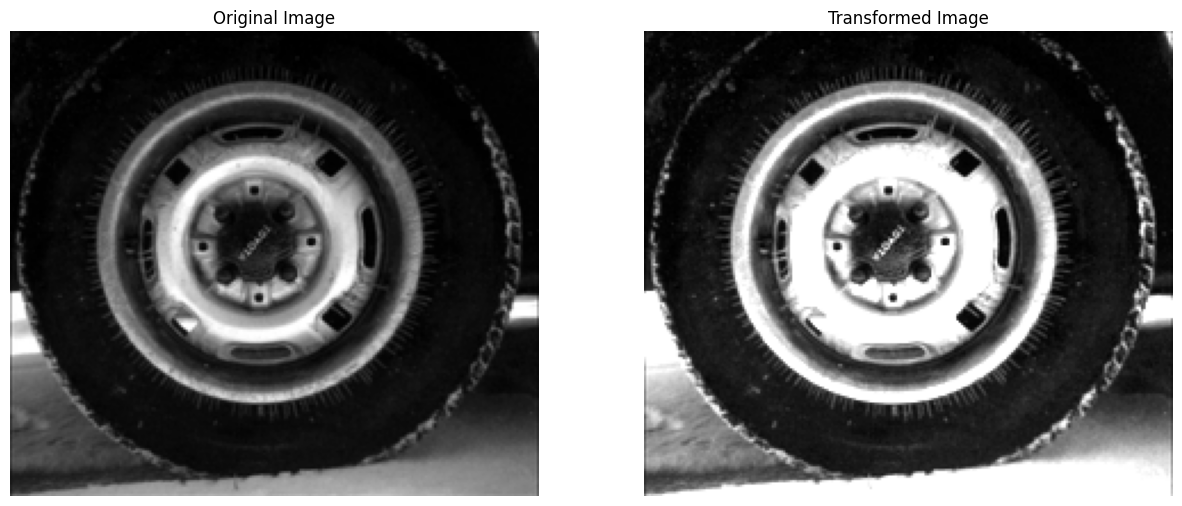

In [ ]:
# EXERCISE 4 - Pixel Transform

img_gray = cv2.imread("prac02ex04img01.png")
alpha = 5  # Contrast control (1.0 means no change)
beta  = 2   # Brightness control

img_affine =

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# complete the plot

plt.show()



# Exercise 5 - Histogram Equalization

https://docs.opencv.org/3.4/d4/d1b/tutorial_histogram_equalization.html


Histogram equalization is a method in image processing to enhance the contrast of an image by redistributing the intensity levels across the entire range. In this exercise, you will use OpenCV's `equalizeHist` function to perform histogram equalization on a given image.

#### Task
1. **Load the Image**: Read a gray-scale image that you want to enhance.
2. **Apply Histogram Equalization**: Use OpenCV's `equalizeHist` function to equalize the image's histogram.
3. **Compute Histograms**: Compute the histograms of both the original and equalized images.
4. **Visualize**: Plot the original image, equalized image, and their corresponding histogram
   
#### Method
1. **Calculate Histogram**: A graph showing the frequency of each intensity value in the image.
2. **Calculate Cumulative Distribution Function (CDF)**: The sum of the histogram up to a given intensity value.
3. **Normalize the CDF**Divide the CDF by the total number of pixels in the image. This scales the CDF so that it starts at 0 and ends at 1.1.
4. **Create Equalized Histogram**: Multiply the normalized CDF by the maximum intensity value to spread out the intensity values.
5. **Apply the Mapping to the Image**: Replace each pixel's intensity with the corresponding value from the equalized histogram.tograms.

#### Observation
- **Contrast Enhancement**: You should notice that the equalized image has improved contrast compared to the original image.
- **Histogram Distribution**: The histogram of the equalized image should be more uniformly distributed across the intensity range. This means that the histogram has been stretched out more widely, utilizing the full range of pixel values.

#### Code Example
```python
import cv2
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('image.png', cv2.IMREAD_GRAYSCALE)

# Apply histogram equalization
equalized_image = cv2.equalizeHist(image)

# Compute histograms
hist_original = cv2.calcHist([image], [0], None, [256], [0, 256])
hist_equalized = cv2.calcHist([equalized_image], [0], None, [256], [0, 256])

# Plot images and histograms
plt.subplot(2, 2, 1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(2, 2, 2), plt.imshow(equalized_image, cmap='gray'), plt.title('Equalized Image')
plt.subplot(2, 2, 3), plt.plot(hist_original), plt.title('Original Histogram')
plt.subplot(2, 2, 4), plt.plot(hist_equalized), plt.title('Equalized Histogram')
plt.show()



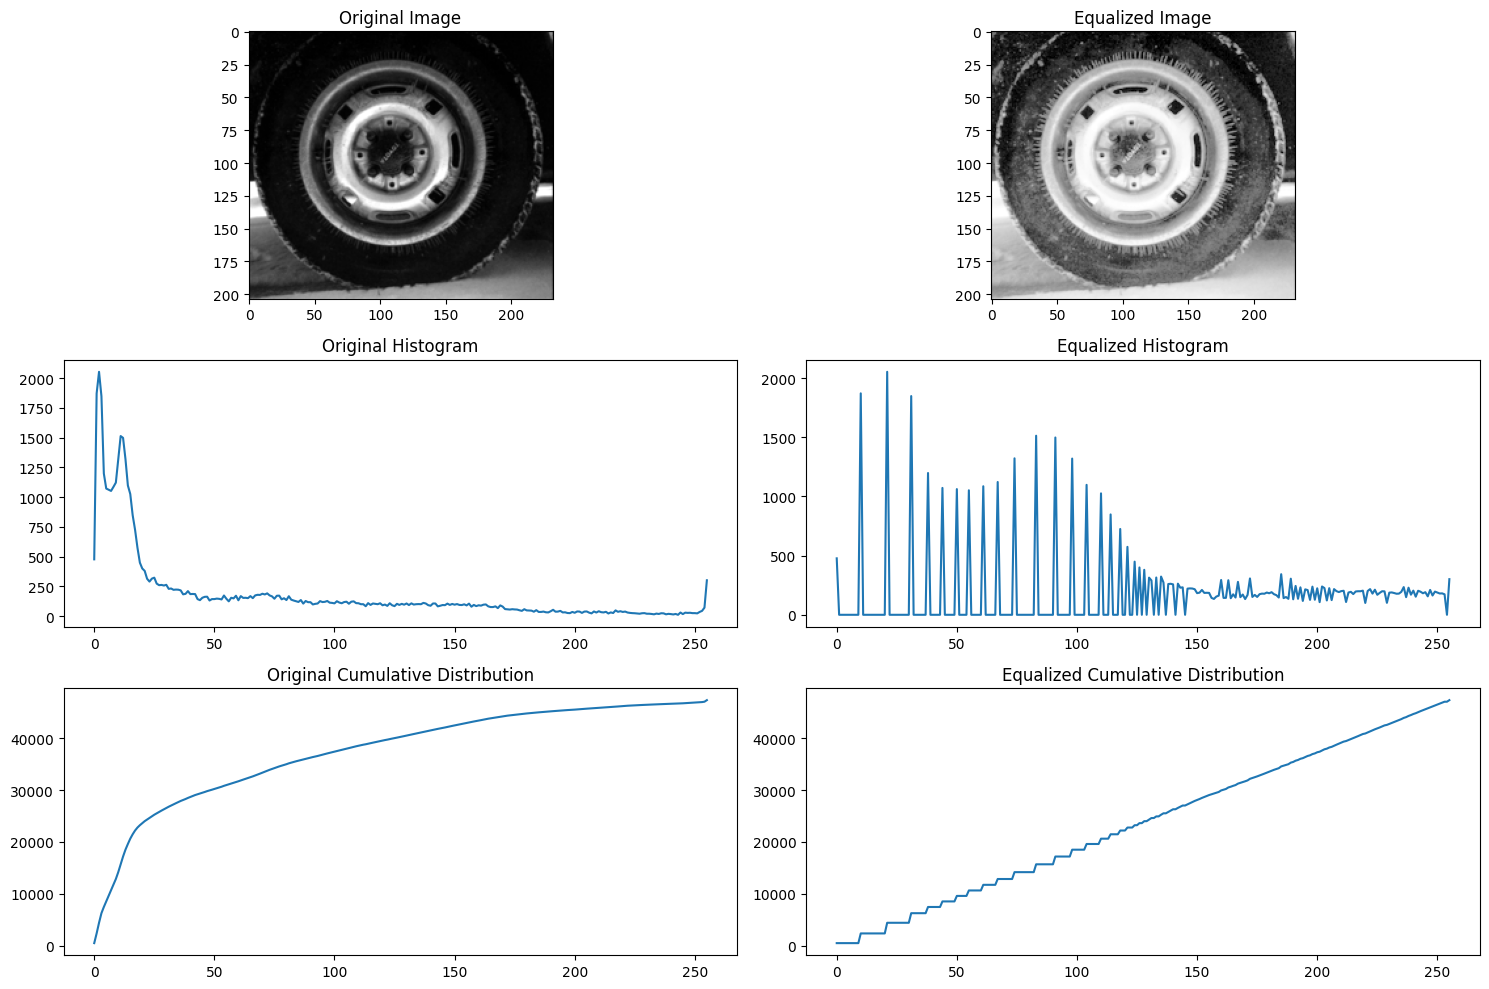

In [ ]:
# EXERCISE 5
image = cv2.imread("prac02ex05img01.png", cv2.IMREAD_GRAYSCALE)

# Apply histogram equalization
equalized_image =

# Compute histograms
hist_original  =
hist_equalized =

# Compute cumulative distribution
cdf_original  =
cdf_equalized =

plt.figure(figsize=(15, 10))
# Display original and equalized images
plt.subplot(3, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(3, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')

# Display histograms
plt.subplot(3, 2, 3)
plt.plot(hist_original)
plt.title('Original Histogram')
plt.subplot(3, 2, 4)
plt.plot(hist_equalized)
plt.title('Equalized Histogram')

# Display cumulative distribution
plt.subplot(3, 2, 5)
plt.plot(cdf_original)
plt.title('Original Cumulative Distribution')
plt.subplot(3, 2, 6)
plt.plot(cdf_equalized)
plt.title('Equalized Cumulative Distribution')

plt.tight_layout()
plt.show()

# Exercise 6 - Morphology

[Morphological Operations in OpenCV](https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html)

Morphological operations are fundamental tools in image processing, particularly in the areas of noise reduction, image enhancement, and object recognition. In this exercise, you will explore basic and advanced morphological operations using OpenCV.

#### Morphological Operations
1. **Dilation**:
   - **Structuring Element**: A structuring element (e.g., a 3x3 matrix) is defined, which will be used to probe the image.
   - **Sliding Window**: This structuring element is slid across the image, and at each position, the maximum pixel value covered by the structuring element replaces the center pixel.
   - **Result**: The effect is that bright regions (e.g., white in binary images) expand, and dark regions shrink.
2. **Erosion**:
   - **Structuring Element**: A structuring element is defined, similar to dilation.
   - **Sliding Window**: This structuring element is slid across the image, and at each position, the minimum pixel value covered by the structuring element replaces the center pixel.
   - **Result**: The effect is that bright regions shrink, and dark reg#### Part 2: Advanced Morphological Operations

1. **Opening**: Useful for removing small objects.
   - **Definition**: `open(src,element) = dilate(erode(src,element))`.
   - **Effect**: Removes small noise and objects while retaining the main structures. It first erodes the image to remove small objects and then dilates it to restore the original size of the larger objects.

2. **Closing**: Useful for removing holes.
   - **Definition**: `close(src,element) = erode(dilate(src,element))`.
   - **Effect**: Fills small holes and gaps in the foreground while keeping the main structures intact. It first dilates the image to fill the holes and then erodes it to restore the original size of the objects.

3. **Morphological Gradient**: Useful for finding the outline of an object.
   - **Definition**: `morph_gradient(src,element) = dilate(src,element) - erode(src,element)`.
   - **Effect**: Highlights the boundaries of objects by subtracting the eroded image from the dilated image. The result is an image that emphasizes the edges and outlines.

4. **Blackhat**: The difference between the closing and its input image.
   - **Definition**: `blackhat(src,element) = close(src,element) - src`.
   - **Effect**: Reveals small dark regions and details that are darker than their surroundings. It is useful for extracting dark features that might be overlooked.

### Note
- **Structuring Element**: The choice of structuring element shape and size will have a significant impact on the result. Different shapes like rectangles, ellipses, and crosses can be used depending on the specific application.
- **Applications**: These operations are widely used in various applications like noise reduction, edge detection, object segmentation, and texture analysis. They provide powerful tools for preprocessing images and extracting relevant features.
l dark regions in the image.

### Task
- **Load the Image**: Read a binary or gray-scale image.
- **Create Structuring Element**: Use `cv2.getStructuringElement` to create the structuring element. You can experiment with different shapes like `cv2.MORPH_RECT`,
rphologyEx(image, cv2.MORPH_BLACKHAT, element)

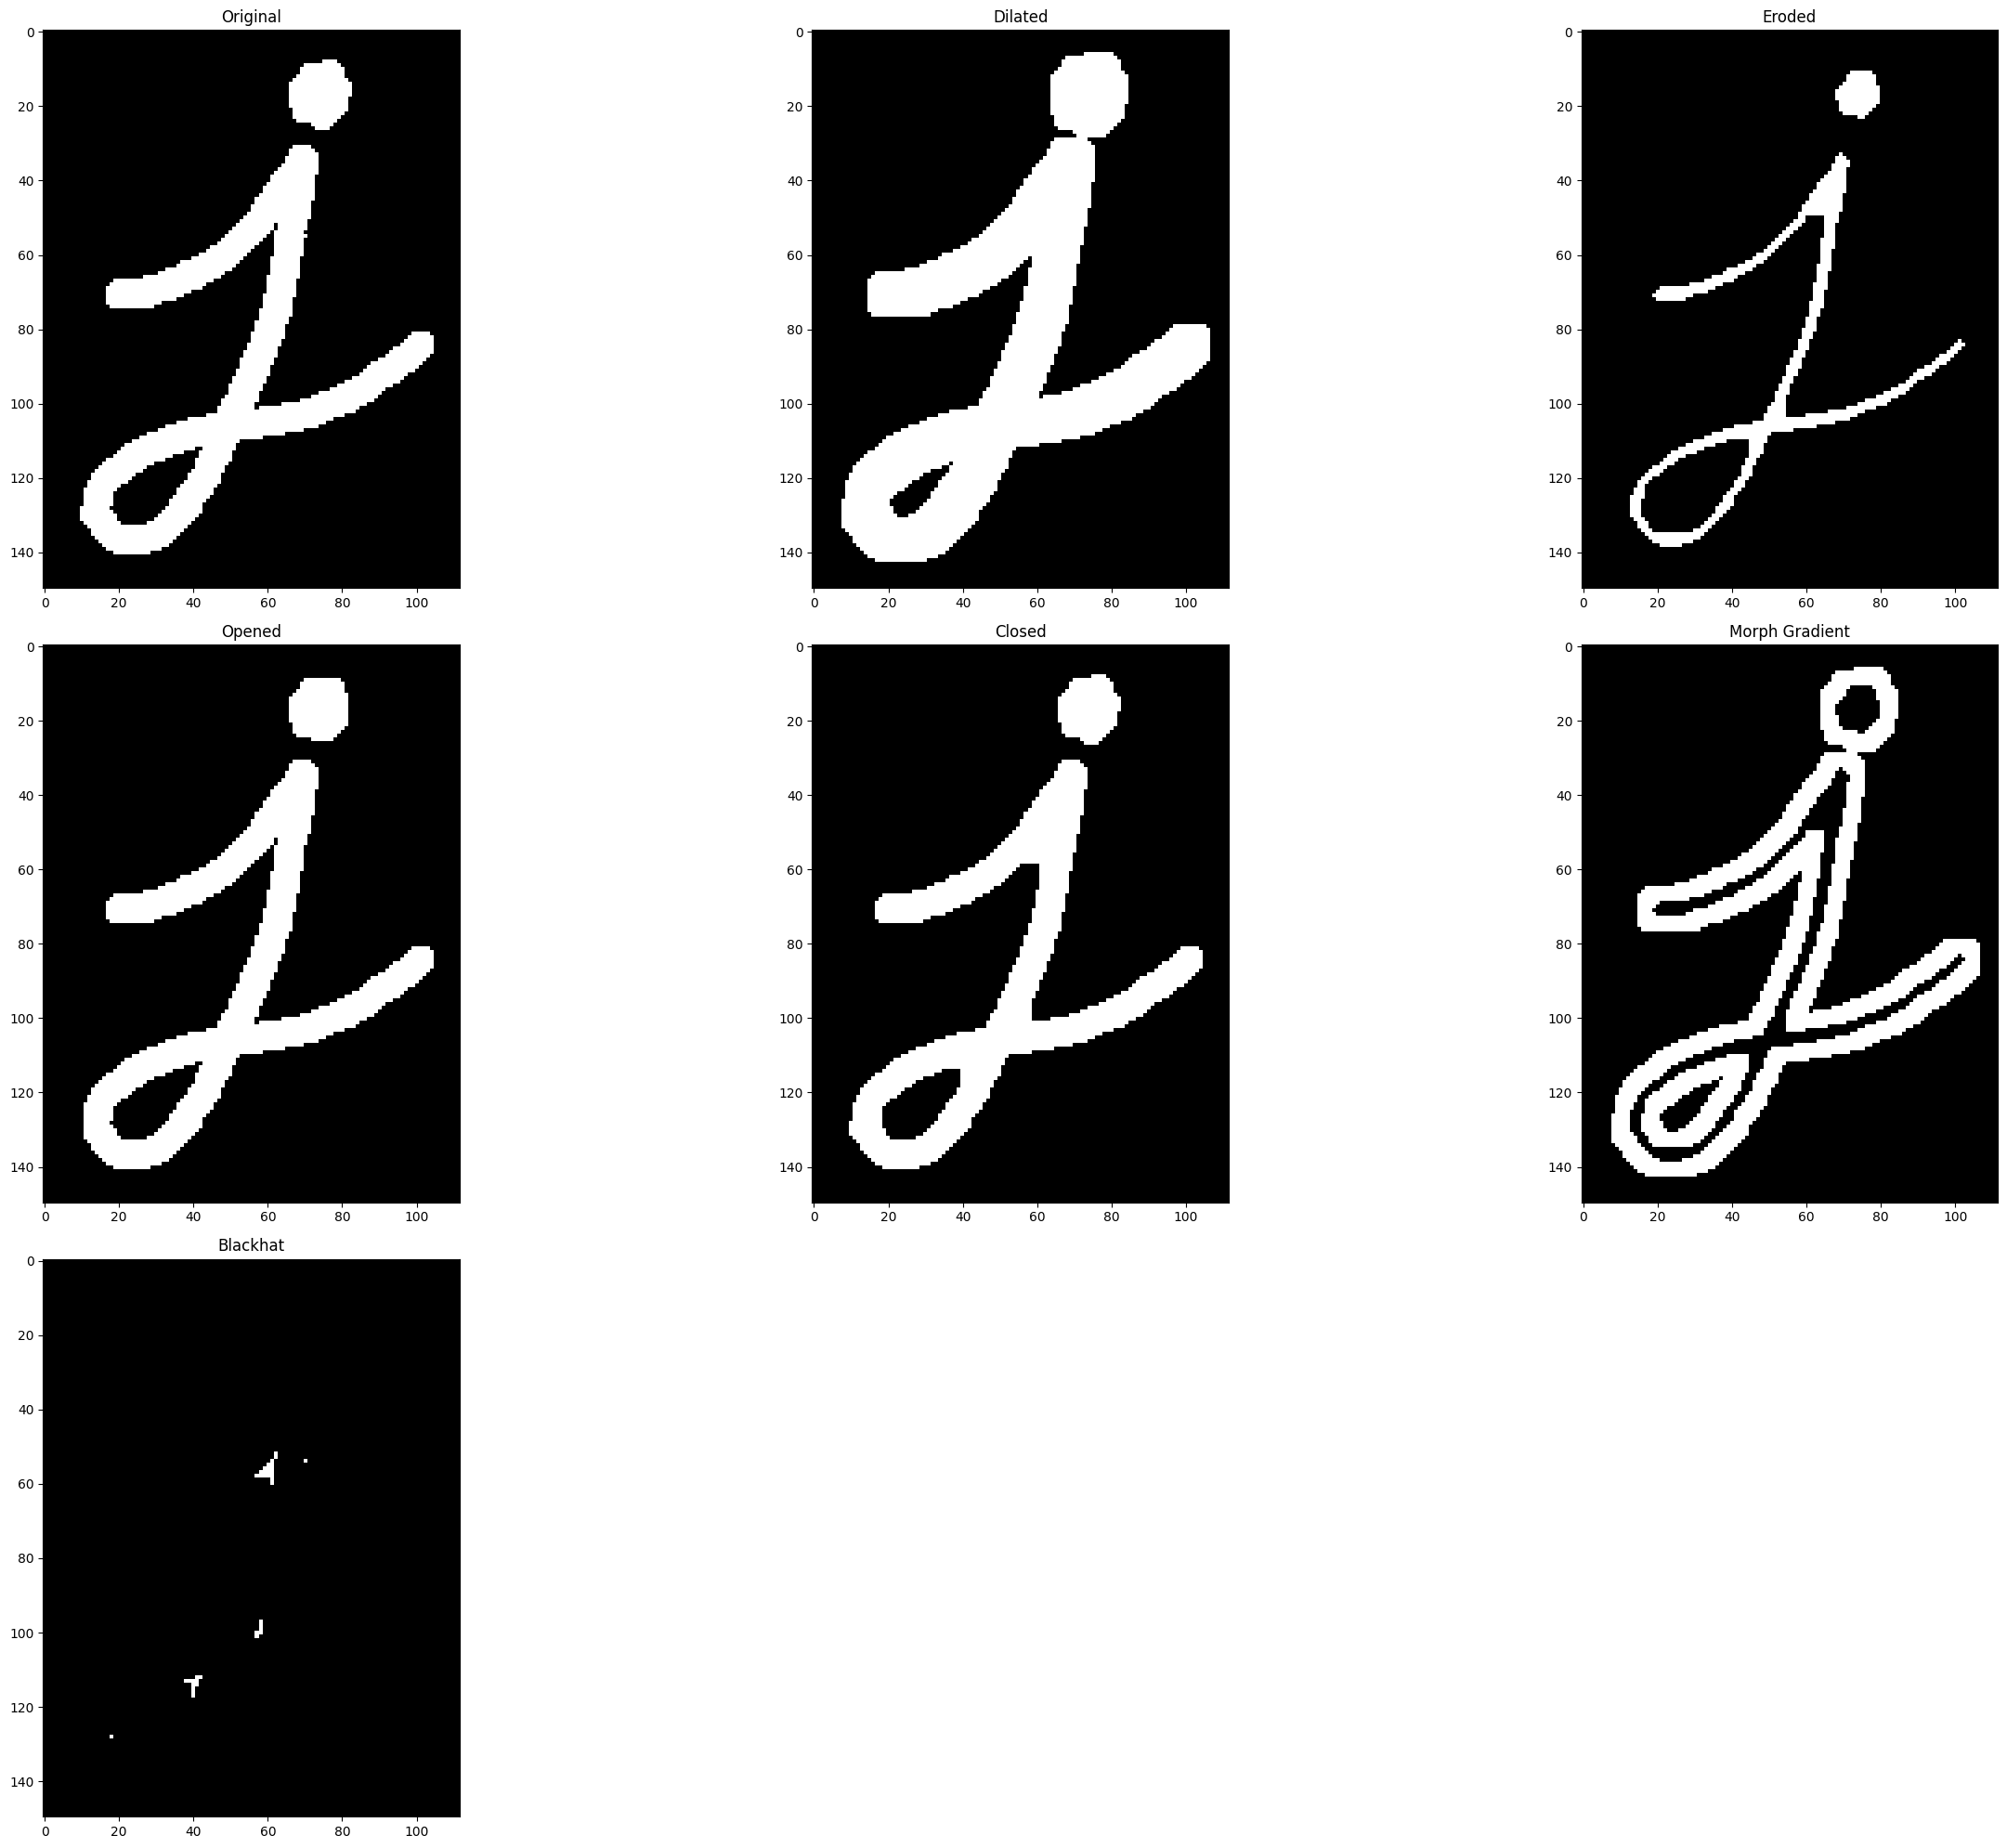

In [ ]:
# EXERCISE 6 - Morphological Image Processing

image = cv2.imread("prac02ex06img01.png", cv2.IMREAD_GRAYSCALE)
image = 255 - image

# Check if the image is read correctly
if image is None:
    print(f"Image not found at {image_path}")
else:
    # Define the structuring element
    kernel_size = 5
    element = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_size, kernel_size))

    # Perform dilation
    dilated = cv2.dilate(image, element)

    # Perform erosion
    eroded = cv2.erode(image, element)

    # Perform opening
    opened =

    # Perform closing
    closed =

    # Perform morphological gradient
    morph_gradient =

    # Perform blackhat
    blackhat =

    plt.figure(figsize=(25, 20))
    # Display results
    plt.subplot(3, 3, 1), plt.imshow(image, cmap='gray'), plt.title('Original')
    plt.subplot(3, 3, 2), plt.imshow(dilated, cmap='gray'), plt.title('Dilated')

    # complete the plot

    plt.tight_layout()
    plt.show()
